# **Csv and Image folder load and samples display**

In [ ]:
import os
import zipfile
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')


drive_root = '/content/drive/MyDrive/'
train_zip_path = os.path.join(drive_root, 'training_set.zip')
test_zip_path = os.path.join(drive_root, 'test_set.zip')
train_csv_path = os.path.join(drive_root, 'training_set_pixel_size_and_HC.csv')
test_csv_path = os.path.join(drive_root, 'test_set_pixel_size.csv')

print("Checking if files exist...")
print(f"Train zip exists: {os.path.exists(train_zip_path)}")
print(f"Test zip exists: {os.path.exists(test_zip_path)}")
print(f"Train CSV exists: {os.path.exists(train_csv_path)}")
print(f"Test CSV exists: {os.path.exists(test_csv_path)}")

# Create directories
base_dir = '/content/data'
os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
train_images_dir = os.path.join(train_dir, 'images')
train_masks_dir = os.path.join(train_dir, 'masks')
test_images_dir = os.path.join(test_dir, 'images')

os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_masks_dir, exist_ok=True)
os.makedirs(test_images_dir, exist_ok=True)

# Extract training data
print("\nExtracting training data...")
try:
    with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
        zip_ref.extractall(train_dir)
    print("Training data extracted successfully!")
    print("Contents of train directory:")
    print(os.listdir(train_dir))
except Exception as e:
    print(f"Error extracting training data: {e}")

# Extract test data
print("\nExtracting test data...")
try:
    with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
        zip_ref.extractall(test_dir)
    print("Test data extracted successfully!")
    print("Contents of test directory:")
    print(os.listdir(test_dir))
except Exception as e:
    print(f"Error extracting test data: {e}")

# Load CSV files
print("\nLoading CSV files...")
try:
    train_csv = pd.read_csv(train_csv_path)
    print("Training CSV loaded successfully!")
    print(f"Found {len(train_csv)} entries in training CSV")
except Exception as e:
    print(f"Error loading training CSV: {e}")
    train_csv = None

try:
    test_csv = pd.read_csv(test_csv_path)
    print("Test CSV loaded successfully!")
    print(f"Found {len(test_csv)} entries in test CSV")
except Exception as e:
    print(f"Error loading test CSV: {e}")
    test_csv = None

# Organize files with more robust checking
print("\nOrganizing files...")

def find_files(directory, pattern):
    """Find all files in directory matching pattern"""
    matches = []
    for root, _, files in os.walk(directory):
        for f in files:
            if f.endswith(pattern):
                matches.append(os.path.join(root, f))
    return matches

# Find all PNGs in train directory
train_pngs = find_files(train_dir, '.png')
print(f"Found {len(train_pngs)} PNG files in train directory")


moved_images = 0
moved_masks = 0

for filepath in train_pngs:
    filename = os.path.basename(filepath)
    try:
        if '_Annotation' in filename:
            new_path = os.path.join(train_masks_dir, filename)
            os.rename(filepath, new_path)
            moved_masks += 1
        else:
            new_path = os.path.join(train_images_dir, filename)
            os.rename(filepath, new_path)
            moved_images += 1
    except Exception as e:
        print(f"Error moving {filename}: {e}")

print(f"Moved {moved_images} images to {train_images_dir}")
print(f"Moved {moved_masks} masks to {train_masks_dir}")

# Check test images
test_pngs = find_files(test_dir, '.png')
print(f"\nFound {len(test_pngs)} test images")
for filepath in test_pngs:
    try:
        filename = os.path.basename(filepath)
        new_path = os.path.join(test_images_dir, filename)
        os.rename(filepath, new_path)
    except Exception as e:
        print(f"Error moving test image {filename}: {e}")

# Final verification
print("\nFinal verification:")
print(f"Training images: {len(os.listdir(train_images_dir))}")
print(f"Training masks: {len(os.listdir(train_masks_dir))}")
print(f"Test images: {len(os.listdir(test_images_dir))}")

if train_csv is not None:
    print("\nSample training CSV data:")
    print(train_csv.head())

if test_csv is not None:
    print("\nSample test CSV data:")
    print(test_csv.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Checking if files exist...
Train zip exists: True
Test zip exists: True
Train CSV exists: True
Test CSV exists: True

Extracting training data...
Training data extracted successfully!
Contents of train directory:
['masks', 'images', 'training_set']

Extracting test data...
Test data extracted successfully!
Contents of test directory:
['images', 'test_set']

Loading CSV files...
Training CSV loaded successfully!
Found 999 entries in training CSV
Test CSV loaded successfully!
Found 335 entries in test CSV

Organizing files...
Found 3996 PNG files in train directory
Moved 1998 images to /content/data/train/images
Moved 1998 masks to /content/data/train/masks

Found 670 test images

Final verification:
Training images: 999
Training masks: 999
Test images: 335

Sample training CSV data:
   filename  pixel size  head circumference (mm)
0  1_HC.png    0.069136      

# **Annotated mask and images overlapping display**

Found 999 images and 999 masks

Sample 1:
Image: 100_2HC.png
Mask: 100_2HC_Annotation.png


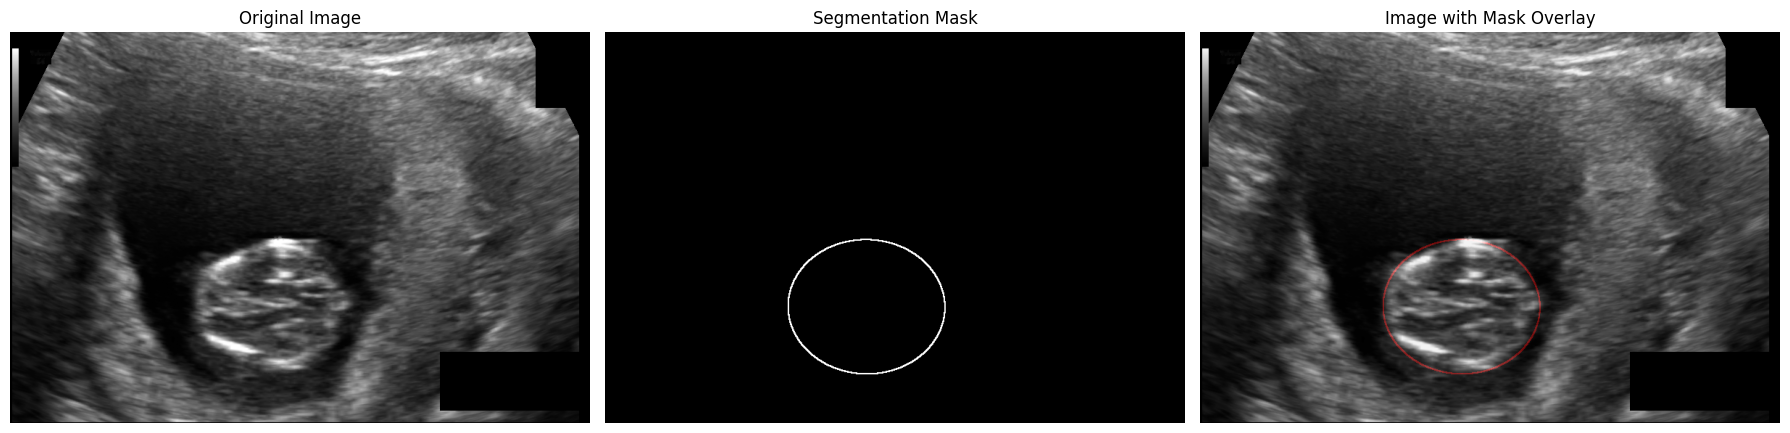


Sample 2:
Image: 101_HC.png
Mask: 101_HC_Annotation.png


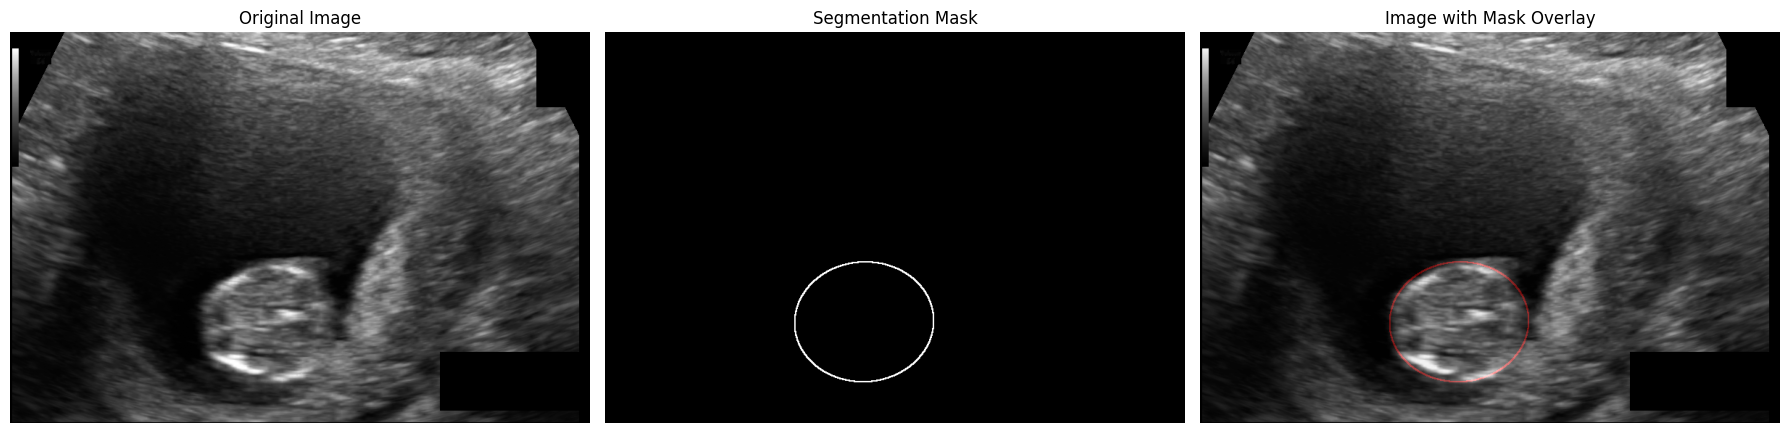


Sample 3:
Image: 102_2HC.png
Mask: 102_2HC_Annotation.png


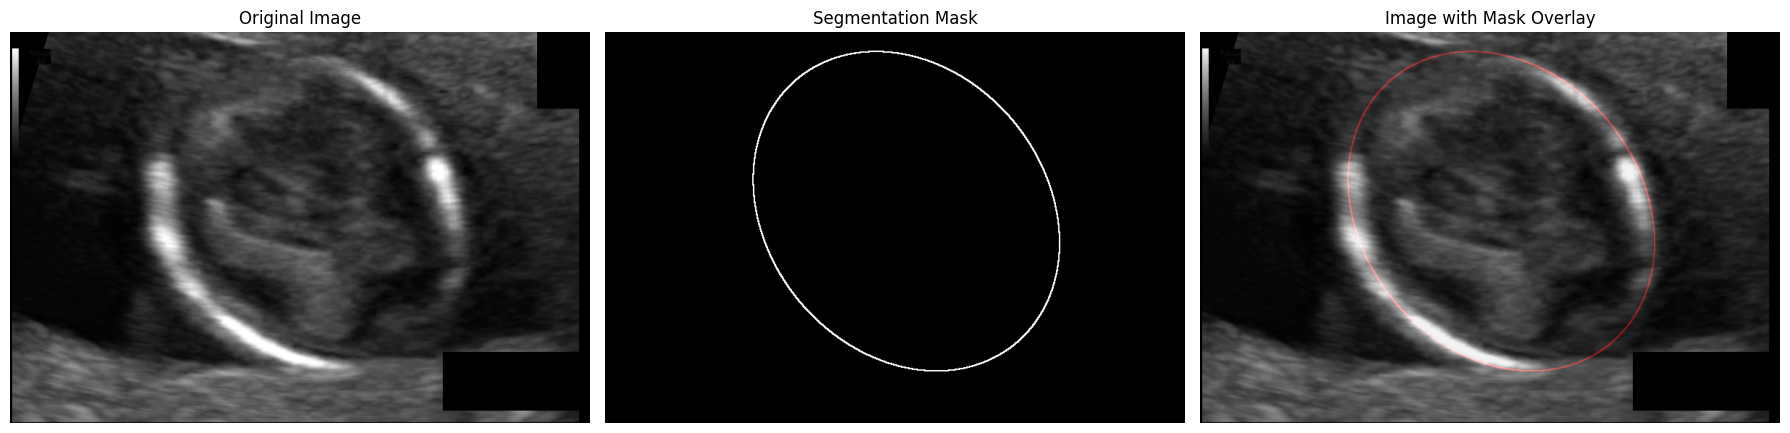

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from glob import glob

train_images_dir = '/content/data/train/images'
train_masks_dir = '/content/data/train/masks'

# Get sample images and masks
image_files = sorted(glob(os.path.join(train_images_dir, '*.png')))
mask_files = sorted(glob(os.path.join(train_masks_dir, '*_Annotation.png')))

# Verify we have matching pairs
if len(image_files) == 0 or len(mask_files) == 0:
    print("No images or masks found! Check your paths:")
    print(f"Images path: {train_images_dir}")
    print(f"Masks path: {train_masks_dir}")
else:
    print(f"Found {len(image_files)} images and {len(mask_files)} masks")

# Display function
def display_image_with_mask(image_path, mask_path, alpha=0.4):
    """Display image with mask overlay"""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if image is None or mask is None:
        print(f"Could not read {image_path} or {mask_path}")
        return

    colored_mask = np.zeros((*mask.shape, 3), dtype=np.uint8)
    colored_mask[mask > 0] = [255, 0, 0]  # Red color

    # Convert grayscale image to RGB for visualization
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    # Overlay mask
    overlayed = cv2.addWeighted(image_rgb, 1, colored_mask, alpha, 0)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Display original image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Display mask
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('Segmentation Mask')
    axes[1].axis('off')

    # Display overlay
    axes[2].imshow(overlayed)
    axes[2].set_title('Image with Mask Overlay')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

num_samples = min(3, len(image_files))
for i in range(num_samples):
    print(f"\nSample {i+1}:")
    print(f"Image: {os.path.basename(image_files[i])}")
    print(f"Mask: {os.path.basename(mask_files[i])}")
    display_image_with_mask(image_files[i], mask_files[i])

# **Preprocessing**
 Resizing, normalization, binarization of masks, contrast enhancement using CLAHE,
##  **Data augmentation techniques**:
horizontal flip, vertical flip, rotation, random brightness and contrast


1.   horizontal flip
2.   vertical flip

1.   rotation
2.  random brightness

1.   contrast
2.   elastic transform

1.   grid distortion
2.   random gamma correction



<ipython-input-4-e16996129287>:26: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.3),


Found 999 images and 999 masks
Starting preprocessing...


100%|██████████| 999/999 [00:29<00:00, 33.55it/s]


Preprocessing completed!
Original images: 999
Augmented images: 2997
Total processed images: 3996

Sample preprocessed result:


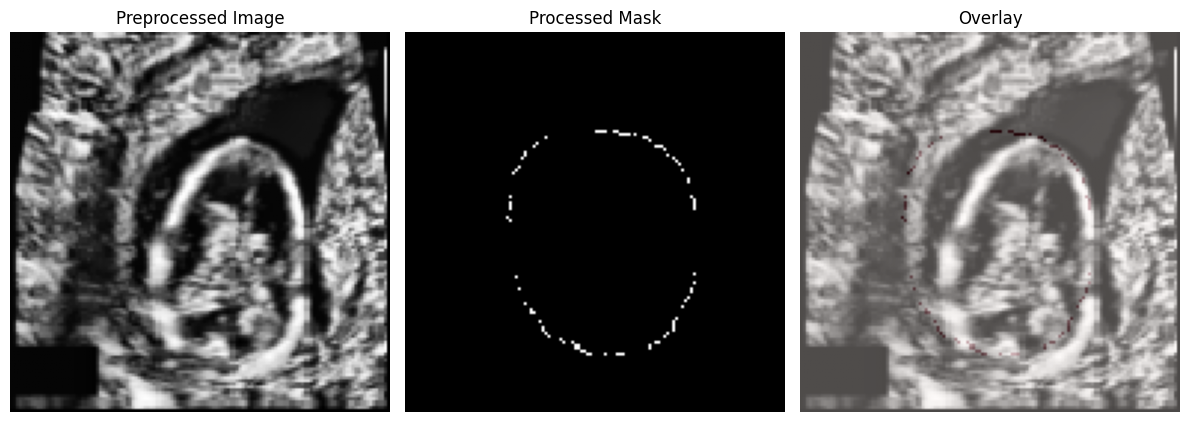

In [ ]:
import cv2
import numpy as np
import albumentations as A
from skimage import exposure
import os
from tqdm import tqdm

TARGET_SIZE = (128, 128)
INPUT_IMAGES_DIR = '/content/data/train/images'
INPUT_MASKS_DIR = '/content/data/train/masks'
OUTPUT_DIR = '/content/data/preprocessed'
AUGMENT = True
NUM_AUGMENTATIONS = 3

os.makedirs(os.path.join(OUTPUT_DIR, 'images'), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, 'masks'), exist_ok=True)

# Define augmentation pipeline
augmentation_pipeline = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Rotate(limit=30, p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.3),
    A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.3),
    A.GridDistortion(p=0.3),
    A.RandomGamma(gamma_limit=(80, 120), p=0.3)
])

# Basic preprocessing function
def preprocess_image(image_path, mask_path, save_prefix=''):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)


    if image is None or mask is None:
        print(f"Failed to load {image_path} or {mask_path}")
        return

    # Resize
    image = cv2.resize(image, TARGET_SIZE, interpolation=cv2.INTER_AREA)
    mask = cv2.resize(mask, TARGET_SIZE, interpolation=cv2.INTER_NEAREST)

    # Normalize and convert to float32
    image = image.astype(np.float32) / 255.0
    mask = (mask > 0).astype(np.float32)

    # Contrast enhancement
    image = exposure.equalize_adapthist(image, clip_limit=0.03)

    # Save original preprocessed version
    base_name = os.path.basename(image_path).replace('.png', '')
    np.save(os.path.join(OUTPUT_DIR, 'images', f'{save_prefix}{base_name}.npy'), image)
    np.save(os.path.join(OUTPUT_DIR, 'masks', f'{save_prefix}{base_name}_mask.npy'), mask)

    return image, mask

# Process all images
image_files = sorted([f for f in os.listdir(INPUT_IMAGES_DIR) if f.endswith('.png')])
mask_files = sorted([f for f in os.listdir(INPUT_MASKS_DIR) if f.endswith('.png')])

print(f"Found {len(image_files)} images and {len(mask_files)} masks")
print("Starting preprocessing...")

for img_file, mask_file in tqdm(zip(image_files, mask_files), total=len(image_files)):
    img_path = os.path.join(INPUT_IMAGES_DIR, img_file)
    mask_path = os.path.join(INPUT_MASKS_DIR, mask_file)

    # Basic preprocessing
    image, mask = preprocess_image(img_path, mask_path)

    if image is None or mask is None:
        continue

    # Data augmentation
    if AUGMENT:
        for i in range(NUM_AUGMENTATIONS):
            augmented = augmentation_pipeline(image=image, mask=mask)
            aug_img = augmented['image']
            aug_mask = augmented['mask']

            # Save augmented versions
            np.save(os.path.join(OUTPUT_DIR, 'images', f'aug{i}_{img_file.replace(".png", "")}.npy'), aug_img)
            np.save(os.path.join(OUTPUT_DIR, 'masks', f'aug{i}_{img_file.replace(".png", "")}_mask.npy'), aug_mask)

print("Preprocessing completed!")
print(f"Original images: {len(image_files)}")
print(f"Augmented images: {len(image_files) * NUM_AUGMENTATIONS if AUGMENT else 0}")
print(f"Total processed images: {len(image_files) * (1 + NUM_AUGMENTATIONS) if AUGMENT else len(image_files)}")

# Visualization of results
def visualize_sample():
    sample_img = np.load(os.path.join(OUTPUT_DIR, 'images', os.listdir(os.path.join(OUTPUT_DIR, 'images'))[0]))
    sample_mask = np.load(os.path.join(OUTPUT_DIR, 'masks', os.listdir(os.path.join(OUTPUT_DIR, 'masks'))[0]))

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(sample_img, cmap='gray')
    plt.title('Preprocessed Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(sample_mask, cmap='gray')
    plt.title('Processed Mask')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(sample_img, cmap='gray')
    plt.imshow(sample_mask, alpha=0.3, cmap='Reds')
    plt.title('Overlay')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

print("\nSample preprocessed result:")
visualize_sample()

In [ ]:
!pip install segmentation_models_pytorch

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.3/121.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# **MODEL TRAINING**







*  **Model**: U-Net (VGG16)
*  **Loss**: BCE Loss

*   **Optimizer**: Adam
*   **Metrics**: Dice, IoU

*  **Scheduler**: ReduceLROnPlateau
*   **Training**: 100 epochs

*  **Visualization**: Loss, Dice, IoU


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1/100: 100%|██████████| 500/500 [00:36<00:00, 13.61it/s]


Epoch 1/100
Train Loss: 0.2703 | Val Loss: 0.1066
Dice Score: 0.0159 | IoU: 0.0080
Saved new best model


Epoch 2/100: 100%|██████████| 500/500 [00:37<00:00, 13.20it/s]


Epoch 2/100
Train Loss: 0.0721 | Val Loss: 0.0512
Dice Score: 0.0326 | IoU: 0.0166
Saved new best model


Epoch 3/100: 100%|██████████| 500/500 [00:37<00:00, 13.40it/s]


Epoch 3/100
Train Loss: 0.0426 | Val Loss: 0.0365
Dice Score: 0.0539 | IoU: 0.0277
Saved new best model


Epoch 4/100: 100%|██████████| 500/500 [00:37<00:00, 13.32it/s]


Epoch 4/100
Train Loss: 0.0332 | Val Loss: 0.0303
Dice Score: 0.0812 | IoU: 0.0423
Saved new best model


Epoch 5/100: 100%|██████████| 500/500 [00:37<00:00, 13.33it/s]


Epoch 5/100
Train Loss: 0.0290 | Val Loss: 0.0275
Dice Score: 0.0996 | IoU: 0.0524
Saved new best model


Epoch 6/100: 100%|██████████| 500/500 [00:37<00:00, 13.29it/s]


Epoch 6/100
Train Loss: 0.0268 | Val Loss: 0.0256
Dice Score: 0.1136 | IoU: 0.0603
Saved new best model


Epoch 7/100: 100%|██████████| 500/500 [00:37<00:00, 13.30it/s]


Epoch 7/100
Train Loss: 0.0254 | Val Loss: 0.0246
Dice Score: 0.1203 | IoU: 0.0640
Saved new best model


Epoch 8/100: 100%|██████████| 500/500 [00:37<00:00, 13.28it/s]


Epoch 8/100
Train Loss: 0.0243 | Val Loss: 0.0235
Dice Score: 0.1326 | IoU: 0.0711
Saved new best model


Epoch 9/100: 100%|██████████| 500/500 [00:37<00:00, 13.31it/s]


Epoch 9/100
Train Loss: 0.0235 | Val Loss: 0.0227
Dice Score: 0.1447 | IoU: 0.0781
Saved new best model


Epoch 10/100: 100%|██████████| 500/500 [00:37<00:00, 13.32it/s]


Epoch 10/100
Train Loss: 0.0228 | Val Loss: 0.0221
Dice Score: 0.1515 | IoU: 0.0820
Saved new best model


Epoch 11/100: 100%|██████████| 500/500 [00:37<00:00, 13.32it/s]


Epoch 11/100
Train Loss: 0.0220 | Val Loss: 0.0210
Dice Score: 0.1694 | IoU: 0.0926
Saved new best model


Epoch 12/100: 100%|██████████| 500/500 [00:37<00:00, 13.25it/s]


Epoch 12/100
Train Loss: 0.0212 | Val Loss: 0.0201
Dice Score: 0.1917 | IoU: 0.1061
Saved new best model


Epoch 13/100: 100%|██████████| 500/500 [00:37<00:00, 13.28it/s]


Epoch 13/100
Train Loss: 0.0204 | Val Loss: 0.0193
Dice Score: 0.2038 | IoU: 0.1135
Saved new best model


Epoch 14/100: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]


Epoch 14/100
Train Loss: 0.0195 | Val Loss: 0.0191
Dice Score: 0.2168 | IoU: 0.1217
Saved new best model


Epoch 15/100: 100%|██████████| 500/500 [00:37<00:00, 13.22it/s]


Epoch 15/100
Train Loss: 0.0188 | Val Loss: 0.0178
Dice Score: 0.2402 | IoU: 0.1366
Saved new best model


Epoch 16/100: 100%|██████████| 500/500 [00:37<00:00, 13.27it/s]


Epoch 16/100
Train Loss: 0.0180 | Val Loss: 0.0170
Dice Score: 0.2658 | IoU: 0.1534
Saved new best model


Epoch 17/100: 100%|██████████| 500/500 [00:37<00:00, 13.28it/s]


Epoch 17/100
Train Loss: 0.0174 | Val Loss: 0.0171
Dice Score: 0.2704 | IoU: 0.1566


Epoch 18/100: 100%|██████████| 500/500 [00:37<00:00, 13.27it/s]


Epoch 18/100
Train Loss: 0.0168 | Val Loss: 0.0164
Dice Score: 0.2942 | IoU: 0.1728
Saved new best model


Epoch 19/100: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]


Epoch 19/100
Train Loss: 0.0161 | Val Loss: 0.0159
Dice Score: 0.3125 | IoU: 0.1855
Saved new best model


Epoch 20/100: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]


Epoch 20/100
Train Loss: 0.0157 | Val Loss: 0.0153
Dice Score: 0.3320 | IoU: 0.1996
Saved new best model


Epoch 21/100: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]


Epoch 21/100
Train Loss: 0.0153 | Val Loss: 0.0146
Dice Score: 0.3506 | IoU: 0.2133
Saved new best model


Epoch 22/100: 100%|██████████| 500/500 [00:37<00:00, 13.25it/s]


Epoch 22/100
Train Loss: 0.0149 | Val Loss: 0.0147
Dice Score: 0.3539 | IoU: 0.2158


Epoch 23/100: 100%|██████████| 500/500 [00:37<00:00, 13.20it/s]


Epoch 23/100
Train Loss: 0.0146 | Val Loss: 0.0140
Dice Score: 0.3889 | IoU: 0.2424
Saved new best model


Epoch 24/100: 100%|██████████| 500/500 [00:37<00:00, 13.22it/s]


Epoch 24/100
Train Loss: 0.0144 | Val Loss: 0.0138
Dice Score: 0.3874 | IoU: 0.2414
Saved new best model


Epoch 25/100: 100%|██████████| 500/500 [00:37<00:00, 13.26it/s]


Epoch 25/100
Train Loss: 0.0140 | Val Loss: 0.0143
Dice Score: 0.3731 | IoU: 0.2305


Epoch 26/100: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]


Epoch 26/100
Train Loss: 0.0138 | Val Loss: 0.0134
Dice Score: 0.4033 | IoU: 0.2538
Saved new best model


Epoch 27/100: 100%|██████████| 500/500 [00:37<00:00, 13.22it/s]


Epoch 27/100
Train Loss: 0.0136 | Val Loss: 0.0133
Dice Score: 0.4127 | IoU: 0.2616
Saved new best model


Epoch 28/100: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]


Epoch 28/100
Train Loss: 0.0134 | Val Loss: 0.0133
Dice Score: 0.4197 | IoU: 0.2672
Saved new best model


Epoch 29/100: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]


Epoch 29/100
Train Loss: 0.0133 | Val Loss: 0.0128
Dice Score: 0.4259 | IoU: 0.2721
Saved new best model


Epoch 30/100: 100%|██████████| 500/500 [00:37<00:00, 13.27it/s]


Epoch 30/100
Train Loss: 0.0132 | Val Loss: 0.0128
Dice Score: 0.4358 | IoU: 0.2804
Saved new best model


Epoch 31/100: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]


Epoch 31/100
Train Loss: 0.0128 | Val Loss: 0.0124
Dice Score: 0.4521 | IoU: 0.2939
Saved new best model


Epoch 32/100: 100%|██████████| 500/500 [00:37<00:00, 13.30it/s]


Epoch 32/100
Train Loss: 0.0127 | Val Loss: 0.0124
Dice Score: 0.4533 | IoU: 0.2952


Epoch 33/100: 100%|██████████| 500/500 [00:37<00:00, 13.25it/s]


Epoch 33/100
Train Loss: 0.0126 | Val Loss: 0.0122
Dice Score: 0.4612 | IoU: 0.3019
Saved new best model


Epoch 34/100: 100%|██████████| 500/500 [00:37<00:00, 13.20it/s]


Epoch 34/100
Train Loss: 0.0125 | Val Loss: 0.0125
Dice Score: 0.4585 | IoU: 0.2998


Epoch 35/100: 100%|██████████| 500/500 [00:37<00:00, 13.25it/s]


Epoch 35/100
Train Loss: 0.0124 | Val Loss: 0.0125
Dice Score: 0.4549 | IoU: 0.2962


Epoch 36/100: 100%|██████████| 500/500 [00:37<00:00, 13.26it/s]


Epoch 36/100
Train Loss: 0.0123 | Val Loss: 0.0120
Dice Score: 0.4786 | IoU: 0.3170
Saved new best model


Epoch 37/100: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]


Epoch 37/100
Train Loss: 0.0121 | Val Loss: 0.0122
Dice Score: 0.4672 | IoU: 0.3072


Epoch 38/100: 100%|██████████| 500/500 [00:37<00:00, 13.20it/s]


Epoch 38/100
Train Loss: 0.0120 | Val Loss: 0.0115
Dice Score: 0.4860 | IoU: 0.3238
Saved new best model


Epoch 39/100: 100%|██████████| 500/500 [00:37<00:00, 13.30it/s]


Epoch 39/100
Train Loss: 0.0119 | Val Loss: 0.0120
Dice Score: 0.4771 | IoU: 0.3157


Epoch 40/100: 100%|██████████| 500/500 [00:37<00:00, 13.23it/s]


Epoch 40/100
Train Loss: 0.0117 | Val Loss: 0.0117
Dice Score: 0.4947 | IoU: 0.3313


Epoch 41/100: 100%|██████████| 500/500 [00:37<00:00, 13.25it/s]


Epoch 41/100
Train Loss: 0.0116 | Val Loss: 0.0116
Dice Score: 0.4956 | IoU: 0.3321


Epoch 42/100: 100%|██████████| 500/500 [00:37<00:00, 13.28it/s]


Epoch 42/100
Train Loss: 0.0115 | Val Loss: 0.0113
Dice Score: 0.4994 | IoU: 0.3357
Saved new best model


Epoch 43/100: 100%|██████████| 500/500 [00:37<00:00, 13.25it/s]


Epoch 43/100
Train Loss: 0.0114 | Val Loss: 0.0111
Dice Score: 0.5061 | IoU: 0.3420
Saved new best model


Epoch 44/100: 100%|██████████| 500/500 [00:37<00:00, 13.28it/s]


Epoch 44/100
Train Loss: 0.0113 | Val Loss: 0.0111
Dice Score: 0.5143 | IoU: 0.3494
Saved new best model


Epoch 45/100: 100%|██████████| 500/500 [00:37<00:00, 13.23it/s]


Epoch 45/100
Train Loss: 0.0112 | Val Loss: 0.0113
Dice Score: 0.5175 | IoU: 0.3521


Epoch 46/100: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]


Epoch 46/100
Train Loss: 0.0110 | Val Loss: 0.0108
Dice Score: 0.5279 | IoU: 0.3623
Saved new best model


Epoch 47/100: 100%|██████████| 500/500 [00:37<00:00, 13.26it/s]


Epoch 47/100
Train Loss: 0.0110 | Val Loss: 0.0107
Dice Score: 0.5324 | IoU: 0.3665
Saved new best model


Epoch 48/100: 100%|██████████| 500/500 [00:37<00:00, 13.22it/s]


Epoch 48/100
Train Loss: 0.0109 | Val Loss: 0.0108
Dice Score: 0.5225 | IoU: 0.3571


Epoch 49/100: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]


Epoch 49/100
Train Loss: 0.0107 | Val Loss: 0.0109
Dice Score: 0.5275 | IoU: 0.3618


Epoch 50/100: 100%|██████████| 500/500 [00:37<00:00, 13.26it/s]


Epoch 50/100
Train Loss: 0.0107 | Val Loss: 0.0106
Dice Score: 0.5321 | IoU: 0.3663
Saved new best model


Epoch 51/100: 100%|██████████| 500/500 [00:37<00:00, 13.26it/s]


Epoch 51/100
Train Loss: 0.0106 | Val Loss: 0.0104
Dice Score: 0.5391 | IoU: 0.3728
Saved new best model


Epoch 52/100: 100%|██████████| 500/500 [00:37<00:00, 13.27it/s]


Epoch 52/100
Train Loss: 0.0106 | Val Loss: 0.0105
Dice Score: 0.5417 | IoU: 0.3753


Epoch 53/100: 100%|██████████| 500/500 [00:37<00:00, 13.26it/s]


Epoch 53/100
Train Loss: 0.0105 | Val Loss: 0.0105
Dice Score: 0.5416 | IoU: 0.3751


Epoch 54/100: 100%|██████████| 500/500 [00:37<00:00, 13.22it/s]


Epoch 54/100
Train Loss: 0.0104 | Val Loss: 0.0103
Dice Score: 0.5516 | IoU: 0.3847
Saved new best model


Epoch 55/100: 100%|██████████| 500/500 [00:37<00:00, 13.26it/s]


Epoch 55/100
Train Loss: 0.0102 | Val Loss: 0.0100
Dice Score: 0.5558 | IoU: 0.3889
Saved new best model


Epoch 56/100: 100%|██████████| 500/500 [00:37<00:00, 13.23it/s]


Epoch 56/100
Train Loss: 0.0101 | Val Loss: 0.0103
Dice Score: 0.5558 | IoU: 0.3885


Epoch 57/100: 100%|██████████| 500/500 [00:37<00:00, 13.25it/s]


Epoch 57/100
Train Loss: 0.0101 | Val Loss: 0.0104
Dice Score: 0.5464 | IoU: 0.3798


Epoch 58/100: 100%|██████████| 500/500 [00:37<00:00, 13.26it/s]


Epoch 58/100
Train Loss: 0.0100 | Val Loss: 0.0097
Dice Score: 0.5717 | IoU: 0.4046
Saved new best model


Epoch 59/100: 100%|██████████| 500/500 [00:37<00:00, 13.23it/s]


Epoch 59/100
Train Loss: 0.0099 | Val Loss: 0.0099
Dice Score: 0.5692 | IoU: 0.4024


Epoch 60/100: 100%|██████████| 500/500 [00:37<00:00, 13.29it/s]


Epoch 60/100
Train Loss: 0.0097 | Val Loss: 0.0099
Dice Score: 0.5760 | IoU: 0.4089


Epoch 61/100: 100%|██████████| 500/500 [00:37<00:00, 13.28it/s]


Epoch 61/100
Train Loss: 0.0097 | Val Loss: 0.0099
Dice Score: 0.5759 | IoU: 0.4086


Epoch 62/100: 100%|██████████| 500/500 [00:37<00:00, 13.29it/s]


Epoch 62/100
Train Loss: 0.0097 | Val Loss: 0.0095
Dice Score: 0.5860 | IoU: 0.4189
Saved new best model


Epoch 63/100: 100%|██████████| 500/500 [00:37<00:00, 13.25it/s]


Epoch 63/100
Train Loss: 0.0095 | Val Loss: 0.0092
Dice Score: 0.6016 | IoU: 0.4350
Saved new best model


Epoch 64/100: 100%|██████████| 500/500 [00:37<00:00, 13.23it/s]


Epoch 64/100
Train Loss: 0.0094 | Val Loss: 0.0091
Dice Score: 0.5992 | IoU: 0.4327
Saved new best model


Epoch 65/100: 100%|██████████| 500/500 [00:37<00:00, 13.27it/s]


Epoch 65/100
Train Loss: 0.0094 | Val Loss: 0.0090
Dice Score: 0.5945 | IoU: 0.4279
Saved new best model


Epoch 66/100: 100%|██████████| 500/500 [00:37<00:00, 13.27it/s]


Epoch 66/100
Train Loss: 0.0092 | Val Loss: 0.0092
Dice Score: 0.6027 | IoU: 0.4360


Epoch 67/100: 100%|██████████| 500/500 [00:37<00:00, 13.23it/s]


Epoch 67/100
Train Loss: 0.0093 | Val Loss: 0.0090
Dice Score: 0.6020 | IoU: 0.4353
Saved new best model


Epoch 68/100: 100%|██████████| 500/500 [00:37<00:00, 13.23it/s]


Epoch 68/100
Train Loss: 0.0091 | Val Loss: 0.0089
Dice Score: 0.6122 | IoU: 0.4460
Saved new best model


Epoch 69/100: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]


Epoch 69/100
Train Loss: 0.0090 | Val Loss: 0.0089
Dice Score: 0.6107 | IoU: 0.4443
Saved new best model


Epoch 70/100: 100%|██████████| 500/500 [00:37<00:00, 13.25it/s]


Epoch 70/100
Train Loss: 0.0090 | Val Loss: 0.0090
Dice Score: 0.6054 | IoU: 0.4387


Epoch 71/100: 100%|██████████| 500/500 [00:37<00:00, 13.25it/s]


Epoch 71/100
Train Loss: 0.0088 | Val Loss: 0.0088
Dice Score: 0.6121 | IoU: 0.4456
Saved new best model


Epoch 72/100: 100%|██████████| 500/500 [00:37<00:00, 13.26it/s]


Epoch 72/100
Train Loss: 0.0087 | Val Loss: 0.0087
Dice Score: 0.6185 | IoU: 0.4523
Saved new best model


Epoch 73/100: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]


Epoch 73/100
Train Loss: 0.0088 | Val Loss: 0.0087
Dice Score: 0.6204 | IoU: 0.4543


Epoch 74/100: 100%|██████████| 500/500 [00:37<00:00, 13.31it/s]


Epoch 74/100
Train Loss: 0.0086 | Val Loss: 0.0085
Dice Score: 0.6252 | IoU: 0.4594
Saved new best model


Epoch 75/100: 100%|██████████| 500/500 [00:37<00:00, 13.22it/s]


Epoch 75/100
Train Loss: 0.0085 | Val Loss: 0.0084
Dice Score: 0.6411 | IoU: 0.4770
Saved new best model


Epoch 76/100: 100%|██████████| 500/500 [00:37<00:00, 13.25it/s]


Epoch 76/100
Train Loss: 0.0084 | Val Loss: 0.0086
Dice Score: 0.6359 | IoU: 0.4711


Epoch 77/100: 100%|██████████| 500/500 [00:37<00:00, 13.25it/s]


Epoch 77/100
Train Loss: 0.0084 | Val Loss: 0.0083
Dice Score: 0.6464 | IoU: 0.4824
Saved new best model


Epoch 78/100: 100%|██████████| 500/500 [00:37<00:00, 13.27it/s]


Epoch 78/100
Train Loss: 0.0083 | Val Loss: 0.0080
Dice Score: 0.6454 | IoU: 0.4816
Saved new best model


Epoch 79/100: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]


Epoch 79/100
Train Loss: 0.0081 | Val Loss: 0.0082
Dice Score: 0.6522 | IoU: 0.4890


Epoch 80/100: 100%|██████████| 500/500 [00:37<00:00, 13.22it/s]


Epoch 80/100
Train Loss: 0.0080 | Val Loss: 0.0080
Dice Score: 0.6565 | IoU: 0.4938
Saved new best model


Epoch 81/100: 100%|██████████| 500/500 [00:37<00:00, 13.25it/s]


Epoch 81/100
Train Loss: 0.0080 | Val Loss: 0.0077
Dice Score: 0.6618 | IoU: 0.5000
Saved new best model


Epoch 82/100: 100%|██████████| 500/500 [00:37<00:00, 13.27it/s]


Epoch 82/100
Train Loss: 0.0079 | Val Loss: 0.0077
Dice Score: 0.6644 | IoU: 0.5027
Saved new best model


Epoch 83/100: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]


Epoch 83/100
Train Loss: 0.0078 | Val Loss: 0.0077
Dice Score: 0.6644 | IoU: 0.5025


Epoch 84/100: 100%|██████████| 500/500 [00:37<00:00, 13.25it/s]


Epoch 84/100
Train Loss: 0.0077 | Val Loss: 0.0076
Dice Score: 0.6686 | IoU: 0.5077
Saved new best model


Epoch 85/100: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]


Epoch 85/100
Train Loss: 0.0077 | Val Loss: 0.0075
Dice Score: 0.6729 | IoU: 0.5121
Saved new best model


Epoch 86/100: 100%|██████████| 500/500 [00:37<00:00, 13.21it/s]


Epoch 86/100
Train Loss: 0.0076 | Val Loss: 0.0077
Dice Score: 0.6669 | IoU: 0.5048


Epoch 87/100: 100%|██████████| 500/500 [00:37<00:00, 13.19it/s]


Epoch 87/100
Train Loss: 0.0075 | Val Loss: 0.0074
Dice Score: 0.6792 | IoU: 0.5194
Saved new best model


Epoch 88/100: 100%|██████████| 500/500 [00:37<00:00, 13.17it/s]


Epoch 88/100
Train Loss: 0.0074 | Val Loss: 0.0071
Dice Score: 0.6945 | IoU: 0.5372
Saved new best model


Epoch 89/100: 100%|██████████| 500/500 [00:37<00:00, 13.21it/s]


Epoch 89/100
Train Loss: 0.0073 | Val Loss: 0.0073
Dice Score: 0.6833 | IoU: 0.5239


Epoch 90/100: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]


Epoch 90/100
Train Loss: 0.0073 | Val Loss: 0.0070
Dice Score: 0.6942 | IoU: 0.5371
Saved new best model


Epoch 91/100: 100%|██████████| 500/500 [00:37<00:00, 13.27it/s]


Epoch 91/100
Train Loss: 0.0071 | Val Loss: 0.0071
Dice Score: 0.6966 | IoU: 0.5396


Epoch 92/100: 100%|██████████| 500/500 [00:37<00:00, 13.27it/s]


Epoch 92/100
Train Loss: 0.0070 | Val Loss: 0.0072
Dice Score: 0.6959 | IoU: 0.5385


Epoch 93/100: 100%|██████████| 500/500 [00:37<00:00, 13.23it/s]


Epoch 93/100
Train Loss: 0.0070 | Val Loss: 0.0068
Dice Score: 0.7049 | IoU: 0.5494
Saved new best model


Epoch 94/100: 100%|██████████| 500/500 [00:37<00:00, 13.21it/s]


Epoch 94/100
Train Loss: 0.0069 | Val Loss: 0.0066
Dice Score: 0.7106 | IoU: 0.5564
Saved new best model


Epoch 95/100: 100%|██████████| 500/500 [00:37<00:00, 13.25it/s]


Epoch 95/100
Train Loss: 0.0069 | Val Loss: 0.0073
Dice Score: 0.7037 | IoU: 0.5467


Epoch 96/100: 100%|██████████| 500/500 [00:37<00:00, 13.25it/s]


Epoch 96/100
Train Loss: 0.0068 | Val Loss: 0.0065
Dice Score: 0.7164 | IoU: 0.5631
Saved new best model


Epoch 97/100: 100%|██████████| 500/500 [00:37<00:00, 13.27it/s]


Epoch 97/100
Train Loss: 0.0066 | Val Loss: 0.0063
Dice Score: 0.7263 | IoU: 0.5753
Saved new best model


Epoch 98/100: 100%|██████████| 500/500 [00:37<00:00, 13.19it/s]


Epoch 98/100
Train Loss: 0.0066 | Val Loss: 0.0069
Dice Score: 0.7124 | IoU: 0.5571


Epoch 99/100: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]


Epoch 99/100
Train Loss: 0.0064 | Val Loss: 0.0061
Dice Score: 0.7362 | IoU: 0.5878
Saved new best model


Epoch 100/100: 100%|██████████| 500/500 [00:37<00:00, 13.22it/s]


Epoch 100/100
Train Loss: 0.0064 | Val Loss: 0.0064
Dice Score: 0.7281 | IoU: 0.5773


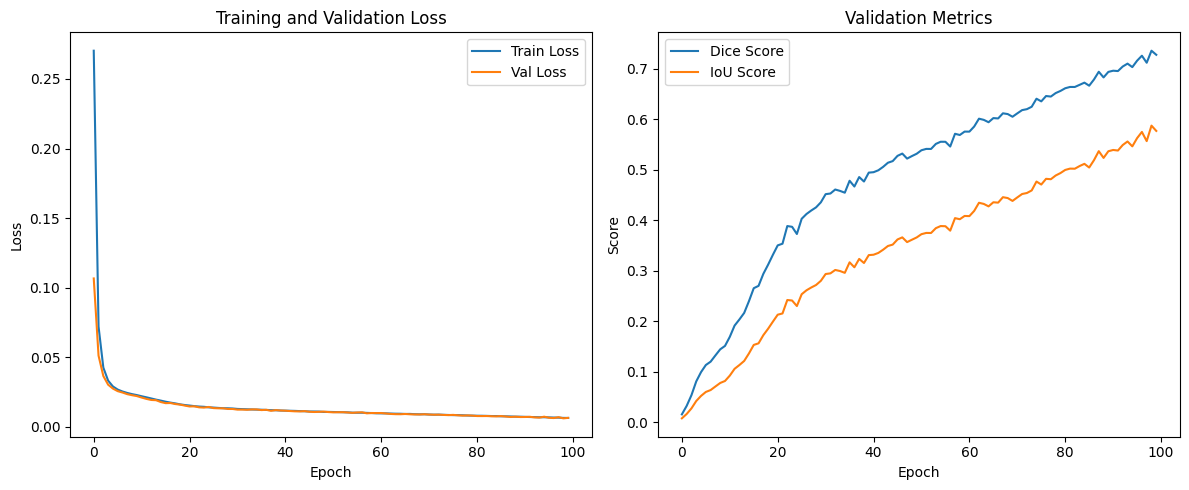

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
import segmentation_models_pytorch as smp


class Config:
    SEED = 42
    IMG_SIZE = (128, 128)
    BATCH_SIZE = 8
    EPOCHS = 100
    LR = 1e-4
    VAL_SPLIT = 0.2
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

config = Config()


torch.manual_seed(config.SEED)
np.random.seed(config.SEED)

# Custom Dataset
class UltrasoundDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.npy')])
        self.mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith('.npy')])

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.image_files[idx])
        mask_path = os.path.join(self.mask_dir, self.mask_files[idx])

        image = np.load(image_path)
        mask = np.load(mask_path)

        # Convert to tensors
        image = torch.from_numpy(image).unsqueeze(0).float()
        mask = torch.from_numpy(mask).unsqueeze(0).float()

        if self.transform:
            augmented = self.transform(image=image.numpy().squeeze(),
                                     mask=mask.numpy().squeeze())
            image = torch.from_numpy(augmented['image']).unsqueeze(0).float()
            mask = torch.from_numpy(augmented['mask']).unsqueeze(0).float()

        return image, mask

# U-Net Model
def create_segnet():
    model = smp.Unet(
        encoder_name="vgg16",  # Using VGG16 encoder
        encoder_weights="imagenet",
        in_channels=1,
        classes=1,
        activation='sigmoid'
    )
    return model

# Metrics
class DiceScore(nn.Module):
    def __init__(self, smooth=1e-5):
        super(DiceScore, self).__init__()
        self.smooth = smooth

    def forward(self, y_pred, y_true):
        y_pred = y_pred.view(-1)
        y_true = y_true.view(-1)
        intersection = (y_pred * y_true).sum()
        return (2. * intersection + self.smooth) / (y_pred.sum() + y_true.sum() + self.smooth)

class IoUScore(nn.Module):
    def __init__(self, smooth=1e-5):
        super(IoUScore, self).__init__()
        self.smooth = smooth

    def forward(self, y_pred, y_true):
        y_pred = y_pred.view(-1)
        y_true = y_true.view(-1)
        intersection = (y_pred * y_true).sum()
        union = y_pred.sum() + y_true.sum() - intersection
        return (intersection + self.smooth) / (union + self.smooth)

# Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    best_val_loss = float('inf')
    history = {'train_loss': [], 'val_loss': [], 'dice': [], 'iou': []}

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        # Training phase
        for images, masks in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images = images.to(config.DEVICE)
            masks = masks.to(config.DEVICE)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(epoch_loss)

        # Validation phase
        model.eval()
        val_loss = 0.0
        dice_metric = DiceScore()
        iou_metric = IoUScore()
        dice_score = 0.0
        iou_score = 0.0

        with torch.no_grad():
            for images, masks in val_loader:
                images = images.to(config.DEVICE)
                masks = masks.to(config.DEVICE)

                outputs = model(images)
                loss = criterion(outputs, masks)
                val_loss += loss.item() * images.size(0)

                # Calculate metrics
                dice_score += dice_metric(outputs, masks).item() * images.size(0)
                iou_score += iou_metric(outputs, masks).item() * images.size(0)

        val_loss = val_loss / len(val_loader.dataset)
        dice_score = dice_score / len(val_loader.dataset)
        iou_score = iou_score / len(val_loader.dataset)

        history['val_loss'].append(val_loss)
        history['dice'].append(dice_score)
        history['iou'].append(iou_score)

        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"Train Loss: {epoch_loss:.4f} | Val Loss: {val_loss:.4f}")
        print(f"Dice Score: {dice_score:.4f} | IoU: {iou_score:.4f}")

        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_segnet_model.pth')
            print("Saved new best model")

    return history

# Main Training Pipeline
def main():

    image_dir = '/content/data/preprocessed/images'
    mask_dir = '/content/data/preprocessed/masks'

    # Split into train and validation
    all_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.npy')])
    train_files, val_files = train_test_split(
        all_files, test_size=config.VAL_SPLIT, random_state=config.SEED
    )


    train_dataset = UltrasoundDataset(
        image_dir=image_dir,
        mask_dir=mask_dir,
        transform=None
    )

    val_dataset = UltrasoundDataset(
        image_dir=image_dir,
        mask_dir=mask_dir,
        transform=None
    )

    # Create data loaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=config.BATCH_SIZE,
        shuffle=True,
        num_workers=2
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=config.BATCH_SIZE,
        shuffle=False,
        num_workers=2
    )

    # Initialize model
    model = create_segnet().to(config.DEVICE)


    criterion = nn.BCELoss()

    # Optimizer with learning rate scheduler
    optimizer = optim.Adam(model.parameters(), lr=config.LR)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.1, patience=5, verbose=True
    )

    # Train model
    history = train_model(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        criterion=criterion,
        optimizer=optimizer,
        num_epochs=config.EPOCHS
    )

    # Plot training history
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['dice'], label='Dice Score')
    plt.plot(history['iou'], label='IoU Score')
    plt.title('Validation Metrics')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model, history

if __name__ == "__main__":
    model, history = main()

In [ ]:
pip install segmentation-models-pytorch


# **Predict head circumference using ellipse fitting on test set**

*   Config class defines paths for model, test images, pixel size CSV, and output CSV.
*  Test dataset class loads and resizes test images to 128x128 pixels.


*   The model  U-Net is loaded.

*   Binary mask generated from model prediction is used to fit an ellipse.

*   Head circumference is calculated using ellipse parameters and pixel size.

*   Results (HC and ellipse data) are saved to a CSV file.

*   Visualizes predictions with an overlay of the fitted ellipse. 8














All required files found. Starting evaluation...
Columns in pixel size CSV: ['filename', 'pixel size']


Processing test images:   2%|▏         | 8/335 [00:00<00:04, 73.11it/s]


Processing: 100_HC.png
Found pixel size: 0.250409305096

Processing: 101_HC.png
Found pixel size: 0.106779552521

Processing: 102_2HC.png
Found pixel size: 0.134877361156

Processing: 103_HC.png
Found pixel size: 0.123860173755

Processing: 104_HC.png
Found pixel size: 0.104340277612

Processing: 105_3HC.png
Found pixel size: 0.126734172242

Processing: 106_HC.png
Found pixel size: 0.281081795692

Processing: 107_3HC.png
Found pixel size: 0.166989525159

Processing: 108_HC.png
Found pixel size: 0.109552119089

Processing: 109_HC.png
Found pixel size: 0.107504826911

Processing: 10_2HC.png
Found pixel size: 0.348563194275

Processing: 110_HC.png
Found pixel size: 0.119453862309

Processing: 111_HC.png
Found pixel size: 0.219169725542

Processing: 112_2HC.png
Found pixel size: 0.0835672517618

Processing: 113_HC.png
Found pixel size: 0.123499849947


Processing test images:   7%|▋         | 24/335 [00:00<00:04, 75.51it/s]


Processing: 114_HC.png
Found pixel size: 0.109908036564

Processing: 115_HC.png
Found pixel size: 0.129494300255

Processing: 116_HC.png
Found pixel size: 0.163182923871

Processing: 117_HC.png
Found pixel size: 0.16132827728

Processing: 118_HC.png
Found pixel size: 0.0629430413246

Processing: 119_2HC.png
Found pixel size: 0.0795051313582

Processing: 11_HC.png
Found pixel size: 0.117421344269

Processing: 120_HC.png
Found pixel size: 0.0714828201703

Processing: 121_HC.png
Found pixel size: 0.0919303794702

Processing: 122_2HC.png
Found pixel size: 0.166956146558

Processing: 123_HC.png
Found pixel size: 0.146154550945

Processing: 124_HC.png
Found pixel size: 0.0569645315409

Processing: 125_HC.png
Found pixel size: 0.122483881508

Processing: 126_2HC.png
Found pixel size: 0.100279283524

Processing: 127_HC.png
Found pixel size: 0.0951051599575

Processing: 128_HC.png
Found pixel size: 0.0736685184871

Processing: 129_2HC.png
Found pixel size: 0.123055475514


Processing test images:  13%|█▎        | 42/335 [00:00<00:03, 80.77it/s]


Processing: 12_HC.png
Found pixel size: 0.142794345106

Processing: 130_HC.png
Found pixel size: 0.123184352386

Processing: 131_HC.png
Found pixel size: 0.112767768177

Processing: 132_HC.png
Found pixel size: 0.1128863611

Processing: 133_HC.png
Found pixel size: 0.0950197453769

Processing: 134_HC.png
Found pixel size: 0.147917323253

Processing: 135_HC.png
Found pixel size: 0.188716425086

Processing: 136_2HC.png
Found pixel size: 0.143880946296

Processing: 137_HC.png
Found pixel size: 0.114491974766

Processing: 138_HC.png
Found pixel size: 0.11803401368

Processing: 139_HC.png
Found pixel size: 0.146099074798

Processing: 13_HC.png
Found pixel size: 0.325923735096

Processing: 140_2HC.png
Found pixel size: 0.119778144927

Processing: 141_HC.png
Found pixel size: 0.123034395823

Processing: 142_2HC.png
Found pixel size: 0.115126628767

Processing: 143_HC.png
Found pixel size: 0.133844179076

Processing: 144_HC.png
Found pixel size: 0.137925181124

Processing: 145_HC.png
Found pi

Processing test images:  18%|█▊        | 61/335 [00:00<00:03, 85.77it/s]


Processing: 146_HC.png
Found pixel size: 0.104967442652

Processing: 147_HC.png
Found pixel size: 0.124706700444

Processing: 148_HC.png
Found pixel size: 0.0895000036274

Processing: 149_2HC.png
Found pixel size: 0.102403334209

Processing: 14_HC.png
Found pixel size: 0.126876136925

Processing: 150_HC.png
Found pixel size: 0.130508479319

Processing: 151_HC.png
Found pixel size: 0.140730092223

Processing: 152_HC.png
Found pixel size: 0.260221246001

Processing: 153_HC.png
Found pixel size: 0.251992106438

Processing: 154_HC.png
Found pixel size: 0.0608067541588

Processing: 155_HC.png
Found pixel size: 0.132082575246

Processing: 156_HC.png
Found pixel size: 0.119149869397

Processing: 157_2HC.png
Found pixel size: 0.248876139522

Processing: 158_2HC.png
Found pixel size: 0.0978129751542

Processing: 159_HC.png
Found pixel size: 0.11566634095

Processing: 15_3HC.png
Found pixel size: 0.13266252844

Processing: 160_2HC.png
Found pixel size: 0.122087525158

Processing: 161_HC.png
Fou

Processing test images:  24%|██▍       | 81/335 [00:00<00:02, 89.52it/s]


Processing: 163_HC.png
Found pixel size: 0.247320353985

Processing: 164_HC.png
Found pixel size: 0.0717299069677

Processing: 165_HC.png
Found pixel size: 0.11322368275

Processing: 166_HC.png
Found pixel size: 0.115773255049

Processing: 167_HC.png
Found pixel size: 0.112081739638

Processing: 168_HC.png
Found pixel size: 0.104094830652

Processing: 169_2HC.png
Found pixel size: 0.109789190085

Processing: 16_HC.png
Found pixel size: 0.235724051793

Processing: 170_HC.png
Found pixel size: 0.119639337063

Processing: 171_HC.png
Found pixel size: 0.0836038986842

Processing: 172_HC.png
Found pixel size: 0.144835795675

Processing: 173_HC.png
Found pixel size: 0.081993654126

Processing: 174_HC.png
Found pixel size: 0.221762153837

Processing: 175_2HC.png
Found pixel size: 0.21740861561

Processing: 176_2HC.png
Found pixel size: 0.0632030111325

Processing: 177_HC.png
Found pixel size: 0.146362229305

Processing: 178_HC.png
Found pixel size: 0.0627333298326

Processing: 179_HC.png
Fou

Processing test images:  30%|███       | 101/335 [00:01<00:02, 93.27it/s]


Processing: 180_HC.png
Found pixel size: 0.0744092019636

Processing: 181_HC.png
Found pixel size: 0.133961232503

Processing: 182_HC.png
Found pixel size: 0.128517808058

Processing: 183_HC.png
Found pixel size: 0.100893330574

Processing: 184_HC.png
Found pixel size: 0.184895065096

Processing: 185_HC.png
Found pixel size: 0.10181704346

Processing: 186_3HC.png
Found pixel size: 0.1373954614

Processing: 187_2HC.png
Found pixel size: 0.191873449546

Processing: 188_3HC.png
Found pixel size: 0.0649442068942

Processing: 189_2HC.png
Found pixel size: 0.104747600853

Processing: 18_HC.png
Found pixel size: 0.128553937643

Processing: 190_HC.png
Found pixel size: 0.112921347779

Processing: 191_4HC.png
Found pixel size: 0.114284035834

Processing: 192_2HC.png
Found pixel size: 0.157119035721

Processing: 193_HC.png
Found pixel size: 0.253724267211

Processing: 194_2HC.png
Found pixel size: 0.260235953641

Processing: 195_HC.png
Found pixel size: 0.116326393083

Processing: 196_HC.png
Fo

Processing test images:  37%|███▋      | 123/335 [00:01<00:02, 98.21it/s]


Processing: 199_HC.png
Found pixel size: 0.146495095071

Processing: 19_HC.png
Found pixel size: 0.147366365966

Processing: 1_2HC.png
Found pixel size: 0.23585714045

Processing: 200_HC.png
Found pixel size: 0.120391414826

Processing: 201_HC.png
Found pixel size: 0.187674893273

Processing: 202_2HC.png
Found pixel size: 0.134385300649

Processing: 203_HC.png
Found pixel size: 0.147598333219

Processing: 204_HC.png
Found pixel size: 0.235888149057

Processing: 205_HC.png
Found pixel size: 0.118606565964

Processing: 206_6HC.png
Found pixel size: 0.178828345878

Processing: 207_HC.png
Found pixel size: 0.166479885578

Processing: 208_HC.png
Found pixel size: 0.114593085918

Processing: 209_HC.png
Found pixel size: 0.263994524353

Processing: 20_HC.png
Found pixel size: 0.100229513645

Processing: 210_HC.png
Found pixel size: 0.0974172470616

Processing: 211_2HC.png
Found pixel size: 0.170049970433

Processing: 212_HC.png
Found pixel size: 0.260389625252

Processing: 213_HC.png
Found p

Processing test images:  43%|████▎     | 143/335 [00:01<00:02, 95.47it/s]


Processing: 216_HC.png
Found pixel size: 0.13176147875

Processing: 217_2HC.png
Found pixel size: 0.102925166792

Processing: 218_HC.png
Found pixel size: 0.0853389804646

Processing: 219_HC.png
Found pixel size: 0.13478451484

Processing: 21_HC.png
Found pixel size: 0.0597069589865

Processing: 220_HC.png
Found pixel size: 0.0846725247674

Processing: 221_HC.png
Found pixel size: 0.120054951736

Processing: 222_HC.png
Found pixel size: 0.111366669337

Processing: 223_HC.png
Found pixel size: 0.136074874852

Processing: 224_2HC.png
Found pixel size: 0.122345555119

Processing: 225_HC.png
Found pixel size: 0.0877106973999

Processing: 226_4HC.png
Found pixel size: 0.103067485328

Processing: 227_HC.png
Found pixel size: 0.108590884053

Processing: 228_2HC.png
Found pixel size: 0.13682605447

Processing: 229_HC.png
Found pixel size: 0.136454685314

Processing: 22_HC.png
Found pixel size: 0.0700399951196

Processing: 230_HC.png
Found pixel size: 0.10873015808

Processing: 231_HC.png
Foun

Processing test images:  49%|████▉     | 164/335 [00:01<00:01, 97.48it/s]


Processing: 234_2HC.png
Found pixel size: 0.120521554028

Processing: 235_HC.png
Found pixel size: 0.0701936617704

Processing: 236_HC.png
Found pixel size: 0.0924945539898

Processing: 237_HC.png
Found pixel size: 0.125404417515

Processing: 238_HC.png
Found pixel size: 0.134797297619

Processing: 239_HC.png
Found pixel size: 0.132069697506

Processing: 23_HC.png
Found pixel size: 0.134217634394

Processing: 240_HC.png
Found pixel size: 0.176806726626

Processing: 241_HC.png
Found pixel size: 0.102872264629

Processing: 242_HC.png
Found pixel size: 0.258437853593

Processing: 243_HC.png
Found pixel size: 0.121416507698

Processing: 244_HC.png
Found pixel size: 0.156431589276

Processing: 245_HC.png
Found pixel size: 0.279805925157

Processing: 246_HC.png
Found pixel size: 0.170023643364

Processing: 247_2HC.png
Found pixel size: 0.138377894958

Processing: 248_HC.png
Found pixel size: 0.326014834066

Processing: 249_2HC.png
Found pixel size: 0.127538457895

Processing: 24_HC.png
Foun

Processing test images:  55%|█████▍    | 184/335 [00:02<00:01, 97.65it/s]


Processing: 253_HC.png
Found pixel size: 0.115545288075

Processing: 254_HC.png
Found pixel size: 0.116019935109

Processing: 255_HC.png
Found pixel size: 0.253417733349

Processing: 256_HC.png
Found pixel size: 0.143333332879

Processing: 257_HC.png
Found pixel size: 0.0752148343556

Processing: 258_2HC.png
Found pixel size: 0.0716604845864

Processing: 259_HC.png
Found pixel size: 0.128584733376

Processing: 25_HC.png
Found pixel size: 0.128474204968

Processing: 260_HC.png
Found pixel size: 0.0655996501446

Processing: 261_3HC.png
Found pixel size: 0.120866364095

Processing: 262_HC.png
Found pixel size: 0.136534458882

Processing: 263_HC.png
Found pixel size: 0.0691229436133

Processing: 264_2HC.png
Found pixel size: 0.258141603225

Processing: 265_2HC.png
Found pixel size: 0.326155078027

Processing: 266_HC.png
Found pixel size: 0.348773701438

Processing: 267_2HC.png
Found pixel size: 0.114554193887

Processing: 268_HC.png
Found pixel size: 0.150791623376

Processing: 269_HC.png

Processing test images:  61%|██████    | 205/335 [00:02<00:01, 99.18it/s]


Processing: 271_HC.png
Found pixel size: 0.139655884769

Processing: 272_2HC.png
Found pixel size: 0.134715220413

Processing: 273_HC.png
Found pixel size: 0.119597074531

Processing: 274_HC.png
Found pixel size: 0.111617008845

Processing: 275_HC.png
Found pixel size: 0.157924108207

Processing: 276_HC.png
Found pixel size: 0.116871040921

Processing: 277_HC.png
Found pixel size: 0.133633346934

Processing: 278_2HC.png
Found pixel size: 0.112222221163

Processing: 279_HC.png
Found pixel size: 0.0839414397875

Processing: 27_2HC.png
Found pixel size: 0.106395204017

Processing: 280_HC.png
Found pixel size: 0.101253809978

Processing: 281_HC.png
Found pixel size: 0.258454390061

Processing: 282_2HC.png
Found pixel size: 0.166432291269

Processing: 283_HC.png
Found pixel size: 0.141810868468

Processing: 284_HC.png
Found pixel size: 0.240856983575

Processing: 285_HC.png
Found pixel size: 0.12864721127

Processing: 286_HC.png
Found pixel size: 0.118230489038

Processing: 287_4HC.png
Fou

Processing test images:  68%|██████▊   | 227/335 [00:02<00:01, 101.34it/s]


Processing: 290_HC.png
Found pixel size: 0.202066729767

Processing: 291_HC.png
Found pixel size: 0.235798713707

Processing: 292_2HC.png
Found pixel size: 0.371304794594

Processing: 293_HC.png
Found pixel size: 0.260168577169

Processing: 294_HC.png
Found pixel size: 0.240741422377

Processing: 295_HC.png
Found pixel size: 0.114064094695

Processing: 296_HC.png
Found pixel size: 0.125862568617

Processing: 297_HC.png
Found pixel size: 0.107785787271

Processing: 298_HC.png
Found pixel size: 0.163124030636

Processing: 299_HC.png
Found pixel size: 0.102101199481

Processing: 29_HC.png
Found pixel size: 0.121450729486

Processing: 2_HC.png
Found pixel size: 0.0679729758082

Processing: 300_HC.png
Found pixel size: 0.222413380941

Processing: 301_HC.png
Found pixel size: 0.131601001087

Processing: 302_HC.png
Found pixel size: 0.153206099163

Processing: 303_HC.png
Found pixel size: 0.191834316804

Processing: 304_HC.png
Found pixel size: 0.121687912359

Processing: 305_HC.png
Found pi

Processing test images:  74%|███████▍  | 249/335 [00:02<00:00, 96.04it/s] 


Processing: 30_HC.png
Found pixel size: 0.118127706505

Processing: 310_HC.png
Found pixel size: 0.108860342399

Processing: 311_HC.png
Found pixel size: 0.0602671539927

Processing: 312_HC.png
Found pixel size: 0.110341873798

Processing: 313_HC.png
Found pixel size: 0.2953860339

Processing: 314_HC.png
Found pixel size: 0.0831504066785

Processing: 315_HC.png
Found pixel size: 0.140055881606

Processing: 316_HC.png
Found pixel size: 0.190566801108

Processing: 317_HC.png
Found pixel size: 0.186685941837

Processing: 318_HC.png
Found pixel size: 0.0639305817775

Processing: 319_2HC.png
Found pixel size: 0.220662593842

Processing: 31_HC.png
Found pixel size: 0.104226768017

Processing: 320_HC.png
Found pixel size: 0.15726249665

Processing: 321_HC.png
Found pixel size: 0.0601536574134

Processing: 322_HC.png
Found pixel size: 0.121628409479

Processing: 323_HC.png
Found pixel size: 0.109896463352

Processing: 324_HC.png
Found pixel size: 0.147385439452

Processing: 325_HC.png
Found p

Processing test images:  77%|███████▋  | 259/335 [00:02<00:00, 87.86it/s]


Processing: 326_HC.png
Found pixel size: 0.130876192921

Processing: 327_3HC.png
Found pixel size: 0.260200190854

Processing: 328_HC.png
Found pixel size: 0.152073358044

Processing: 329_HC.png
Found pixel size: 0.124448135495

Processing: 32_HC.png
Found pixel size: 0.113676948981

Processing: 330_HC.png
Found pixel size: 0.110538191266

Processing: 331_HC.png
Found pixel size: 0.138479305638

Processing: 332_HC.png
Found pixel size: 0.0757386377363

Processing: 333_2HC.png
Found pixel size: 0.113106918606

Processing: 334_HC.png
Found pixel size: 0.219140493351

Processing: 335_HC.png
Found pixel size: 0.112420544028

Processing: 33_HC.png
Found pixel size: 0.109812967155

Processing: 34_HC.png
Found pixel size: 0.140191747083

Processing: 35_HC.png
Found pixel size: 0.127838827096

Processing: 36_2HC.png
Found pixel size: 0.119606271386

Processing: 37_2HC.png
Found pixel size: 0.260283110978

Processing: 38_HC.png
Found pixel size: 0.0723095518955


Processing test images:  83%|████████▎ | 277/335 [00:03<00:00, 83.57it/s]


Processing: 39_HC.png
Found pixel size: 0.110730674532

Processing: 3_HC.png
Found pixel size: 0.165202488502

Processing: 40_HC.png
Found pixel size: 0.196812059365

Processing: 41_HC.png
Found pixel size: 0.126094713807

Processing: 42_HC.png
Found pixel size: 0.116940542709

Processing: 43_2HC.png
Found pixel size: 0.174222033599

Processing: 44_HC.png
Found pixel size: 0.167659819126

Processing: 45_HC.png
Found pixel size: 0.0950029436147

Processing: 46_HC.png
Found pixel size: 0.0657061957999

Processing: 47_2HC.png
Found pixel size: 0.118081633534

Processing: 48_HC.png
Found pixel size: 0.146053915515

Processing: 49_HC.png
Found pixel size: 0.189785991724

Processing: 4_HC.png
Found pixel size: 0.0966742061652

Processing: 50_HC.png
Found pixel size: 0.118193108411

Processing: 51_HC.png
Found pixel size: 0.219291033952

Processing: 52_HC.png
Found pixel size: 0.126872213581

Processing: 53_HC.png
Found pixel size: 0.150450043606


Processing test images:  88%|████████▊ | 295/335 [00:03<00:00, 80.72it/s]


Processing: 54_HC.png
Found pixel size: 0.108915800634

Processing: 55_HC.png
Found pixel size: 0.0973103969705

Processing: 56_HC.png
Found pixel size: 0.112665422847

Processing: 57_3HC.png
Found pixel size: 0.112317679973

Processing: 58_HC.png
Found pixel size: 0.125135138631

Processing: 59_HC.png
Found pixel size: 0.166899820169

Processing: 5_HC.png
Found pixel size: 0.202202796936

Processing: 60_HC.png
Found pixel size: 0.148946327322

Processing: 61_HC.png
Found pixel size: 0.146625296158

Processing: 62_HC.png
Found pixel size: 0.209502403935

Processing: 63_HC.png
Found pixel size: 0.113731595603

Processing: 64_2HC.png
Found pixel size: 0.112942684902

Processing: 65_2HC.png
Found pixel size: 0.183807037495

Processing: 66_HC.png
Found pixel size: 0.202188564069

Processing: 67_HC.png
Found pixel size: 0.113579861142

Processing: 68_HC.png
Found pixel size: 0.134791699616

Processing: 69_HC.png
Found pixel size: 0.235921258018


Processing test images:  93%|█████████▎| 313/335 [00:03<00:00, 81.50it/s]


Processing: 6_HC.png
Found pixel size: 0.116687430892

Processing: 70_2HC.png
Found pixel size: 0.119075633231

Processing: 71_HC.png
Found pixel size: 0.124270230532

Processing: 72_HC.png
Found pixel size: 0.0834785898527

Processing: 73_2HC.png
Found pixel size: 0.12214957214

Processing: 74_2HC.png
Found pixel size: 0.107152994643

Processing: 75_HC.png
Found pixel size: 0.127284114177

Processing: 76_HC.png
Found pixel size: 0.137042048815

Processing: 77_HC.png
Found pixel size: 0.142642089299

Processing: 78_HC.png
Found pixel size: 0.110157410304

Processing: 79_2HC.png
Found pixel size: 0.0629605278373

Processing: 7_2HC.png
Found pixel size: 0.139810161458

Processing: 80_HC.png
Found pixel size: 0.217357342658

Processing: 81_HC.png
Found pixel size: 0.121401243094

Processing: 82_HC.png
Found pixel size: 0.160488188267

Processing: 83_HC.png
Found pixel size: 0.107926079022

Processing: 84_HC.png
Found pixel size: 0.112690751472


Processing test images:  99%|█████████▊| 330/335 [00:03<00:00, 78.44it/s]


Processing: 85_HC.png
Found pixel size: 0.111752642526

Processing: 86_HC.png
Found pixel size: 0.14288854599

Processing: 87_HC.png
Found pixel size: 0.129804371239

Processing: 88_HC.png
Found pixel size: 0.185904657399

Processing: 89_HC.png
Found pixel size: 0.322808219541

Processing: 8_2HC.png
Found pixel size: 0.141644256456

Processing: 90_HC.png
Found pixel size: 0.131706501308

Processing: 91_HC.png
Found pixel size: 0.104674311976

Processing: 92_HC.png
Found pixel size: 0.104619053503

Processing: 93_HC.png
Found pixel size: 0.281704983241

Processing: 94_HC.png
Found pixel size: 0.106810952755

Processing: 95_2HC.png
Found pixel size: 0.122550275268

Processing: 96_HC.png
Found pixel size: 0.12375841906

Processing: 97_HC.png
Found pixel size: 0.161284256366

Processing: 98_HC.png
Found pixel size: 0.124121285975

Processing: 99_2HC.png
Found pixel size: 0.140734457634


Processing test images: 100%|██████████| 335/335 [00:03<00:00, 88.51it/s]



Processing: 9_HC.png
Found pixel size: 0.153437599991

Results saved to hc_predictions.csv

Sample predictions:


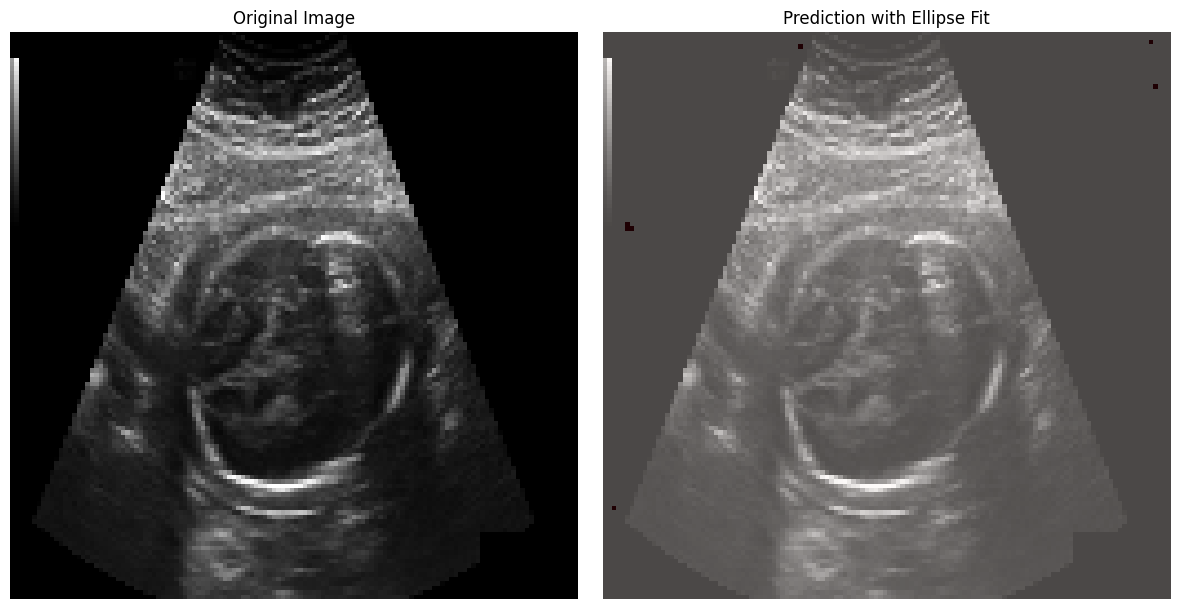

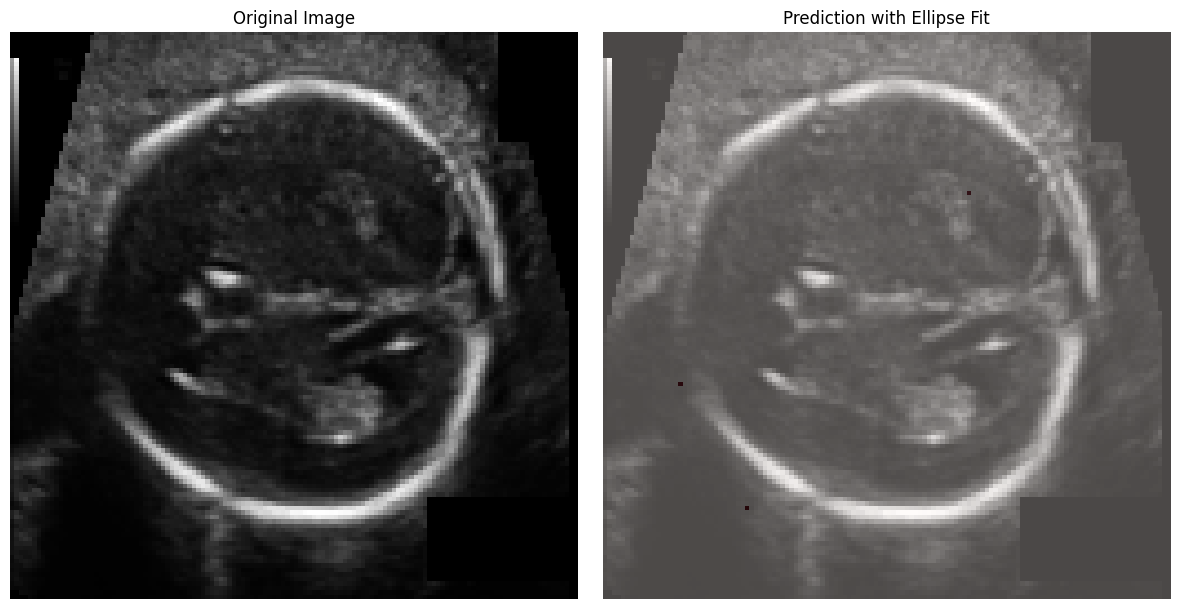

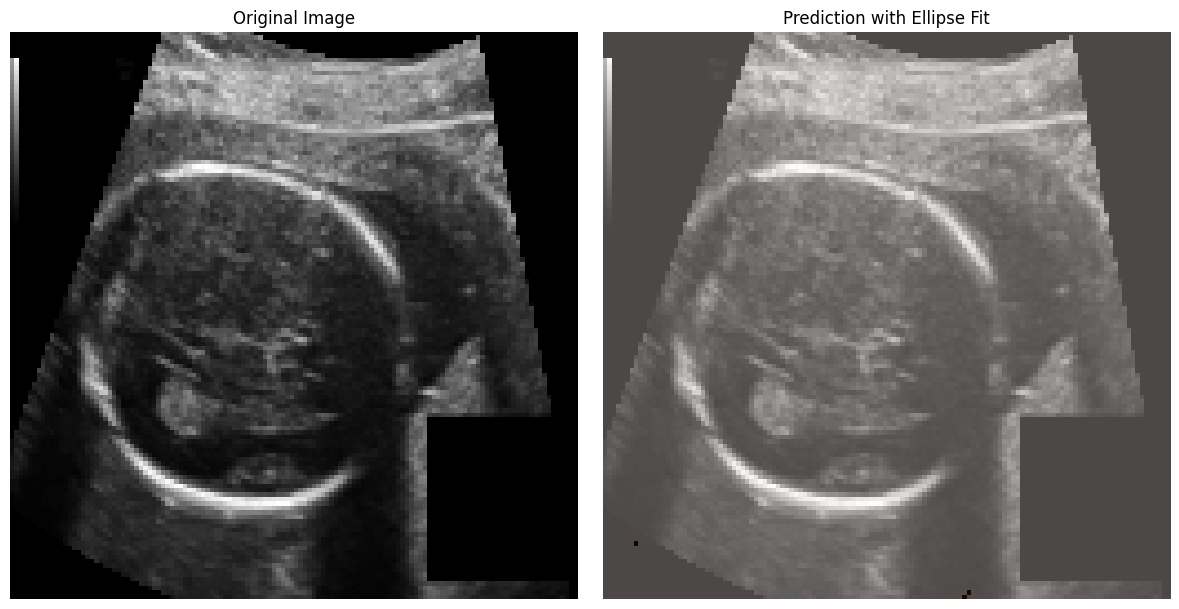

In [ ]:



class EvalConfig:
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    MODEL_PATH = '/content/best_segnet_model.pth'
    TEST_IMAGE_DIR = '/content/data/test/images'
    PIXEL_SIZE_CSV = '/content/drive/MyDrive/test_set_pixel_size.csv'
    OUTPUT_CSV = 'hc_predictions.csv'

config = EvalConfig()

class TestUltrasoundDataset(Dataset):
    def __init__(self, image_dir, target_size=(128, 128)):
        self.image_dir = image_dir
        self.image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])
        self.target_size = target_size

    def __len__(self):
        return len(self.image_files)

    def resize_image(self, image):

        resized_image = cv2.resize(image, self.target_size)
        return resized_image

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.image_files[idx])
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  e

        # Resize the image to 128x128
        resized_image = self.resize_image(image)

        # Convert to tensor
        image_tensor = torch.from_numpy(resized_image).unsqueeze(0).float()
        return image_tensor, self.image_files[idx]

# Load trained model
def load_model(model_path):
    model = smp.Unet(
        encoder_name="vgg16",
        encoder_weights=None,
        in_channels=1,
        classes=1,
        activation='sigmoid'
    )
    model.load_state_dict(torch.load(model_path))
    model.to(config.DEVICE)
    model.eval()
    return model

# Fit ellipse to binary mask
def fit_ellipse_to_mask(mask):
    mask = (mask > 0.5).astype(np.uint8) * 255
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        return None


    largest_contour = max(contours, key=cv2.contourArea)

    if len(largest_contour) < 5:
        return None

    # Fit ellipse
    ellipse = cv2.fitEllipse(largest_contour)
    return ellipse

# Calculate head circumference from ellipse
def calculate_hc(ellipse, pixel_size_mm):
    (center, axes, angle) = ellipse
    a, b = axes[0]/2, axes[1]/2

    # Ramanujan's approximation for ellipse circumference
    h = ((a - b)**2) / ((a + b)**2)
    circumference = np.pi * (a + b) * (1 + (3*h) / (10 + np.sqrt(4 - 3*h)))

    # Convert to mm using pixel size
    circumference_mm = circumference * pixel_size_mm
    return circumference_mm

# Main evaluation function
def evaluate_test_set():

    model = load_model(config.MODEL_PATH)

    # Load test data
    test_dataset = TestUltrasoundDataset(config.TEST_IMAGE_DIR)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


    pixel_size_df = pd.read_csv(config.PIXEL_SIZE_CSV)

    # Verify required columns exist
    print("Columns in pixel size CSV:", pixel_size_df.columns.tolist())

    filename_col = 'filename'
    pixel_size_col = 'pixel size'

    if filename_col not in pixel_size_df.columns or pixel_size_col not in pixel_size_df.columns:
        raise ValueError(f"CSV must contain '{filename_col}' and '{pixel_size_col}' columns")

    results = []

    with torch.no_grad():
        for images, filenames in tqdm(test_loader, desc="Processing test images"):
            images = images.to(config.DEVICE)
            outputs = model(images)

            # Convert to numpy
            pred_mask = outputs.squeeze().cpu().numpy()

            # Fit ellipse
            ellipse = fit_ellipse_to_mask(pred_mask)


            orig_filename = filenames[0]


            print(f"\nProcessing: {orig_filename}")


            try:
                # Try exact match first
                match = pixel_size_df[pixel_size_df[filename_col] == orig_filename]

                # If no exact match, try removing any prefix/suffix
                if len(match) == 0:
                    base_name = orig_filename.split('_')[-1]
                    match = pixel_size_df[pixel_size_df[filename_col].str.endswith(base_name)]

                if len(match) == 0:
                    print(f"Warning: No pixel size found for {orig_filename}, using default 1.0")
                    pixel_size = 1.0
                else:
                    pixel_size = match[pixel_size_col].values[0]
                    print(f"Found pixel size: {pixel_size}")
            except Exception as e:
                print(f"Error getting pixel size: {e}, using default 1.0")
                pixel_size = 1.0

            if ellipse is not None:
                # Calculate HC in mm
                hc_mm = calculate_hc(ellipse, pixel_size)


                (center_x, center_y), (axes_a, axes_b), angle = ellipse

                # Convert to mm
                center_x_mm = center_x * pixel_size
                center_y_mm = center_y * pixel_size
                semi_major_mm = (axes_a/2) * pixel_size
                semi_minor_mm = (axes_b/2) * pixel_size

                results.append({
                    'filename': orig_filename,
                    'hc_mm': hc_mm,
                    'center_x_px': center_x,
                    'center_y_px': center_y,
                    'semi_major_px': axes_a/2,
                    'semi_minor_px': axes_b/2,
                    'angle_deg': angle,
                    'center_x_mm': center_x_mm,
                    'center_y_mm': center_y_mm,
                    'semi_major_mm': semi_major_mm,
                    'semi_minor_mm': semi_minor_mm,
                    'pixel_size_mm': pixel_size
                })
            else:
                # If no ellipse found
                results.append({
                    'filename': orig_filename,
                    'hc_mm': None,
                    'center_x_px': None,
                    'center_y_px': None,
                    'semi_major_px': None,
                    'semi_minor_px': None,
                    'angle_deg': None,
                    'center_x_mm': None,
                    'center_y_mm': None,
                    'semi_major_mm': None,
                    'semi_minor_mm': None,
                    'pixel_size_mm': pixel_size
                })

    # Save results to CSV
    results_df = pd.DataFrame(results)
    results_df.to_csv(config.OUTPUT_CSV, index=False)
    print(f"\nResults saved to {config.OUTPUT_CSV}")

    return results_df

# Visualization function
def visualize_prediction(image_path, model, target_size=(128, 128)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image before creating the tensor
    image = cv2.resize(image, target_size)

    image_tensor = torch.from_numpy(image).unsqueeze(0).unsqueeze(0).float().to(config.DEVICE)

    with torch.no_grad():
        pred_mask = model(image_tensor).squeeze().cpu().numpy()


    binary_mask = (pred_mask > 0.5).astype(np.uint8)

    # Fit ellipse
    ellipse = fit_ellipse_to_mask(binary_mask)

    # Plot
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image, cmap='gray')
    plt.imshow(binary_mask, alpha=0.3, cmap='Reds')
    if ellipse is not None:
        plt.plot(ellipse[0][0], ellipse[0][1], 'ro', markersize=5)
        plt.gca().add_patch(plt.Ellipse(
            ellipse[0], ellipse[1][0], ellipse[1][1],
            angle=ellipse[2], fill=False, edgecolor='red', linewidth=2
        ))
    plt.title('Prediction with Ellipse Fit')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    if ellipse is not None:
        pixel_size = 0.1
        hc_mm = calculate_hc(ellipse, pixel_size)
        print(f"Predicted HC: {hc_mm:.2f} mm")



def check_files_exist():
    required_files = {
        'Model': config.MODEL_PATH,
        'Test images': config.TEST_IMAGE_DIR,
        'Pixel size CSV': config.PIXEL_SIZE_CSV
    }

    missing_files = []
    for name, path in required_files.items():
        if not os.path.exists(path):
            missing_files.append((name, path))

    if missing_files:
        print("Error: Missing required files:")
        for name, path in missing_files:
            print(f"- {name}: {path}")
        return False
    return True

#  main execution block
if __name__ == "__main__":
    if check_files_exist():
        print("All required files found. Starting evaluation...")
        results_df = evaluate_test_set()

        # Visualize sample predictions
        model = load_model(config.MODEL_PATH)
        test_files = sorted([f for f in os.listdir(config.TEST_IMAGE_DIR) if f.endswith('.png')])

        print("\nSample predictions:")
        for i in range(min(3, len(test_files))):
            visualize_prediction(os.path.join(config.TEST_IMAGE_DIR, test_files[i]), model)
    else:
        print("Please ensure all files are in the correct locations before running evaluation.")

# **Calculates metrics **

All required files found. Starting evaluation...


Processing test images: 100%|██████████| 335/335 [00:03<00:00, 94.92it/s]


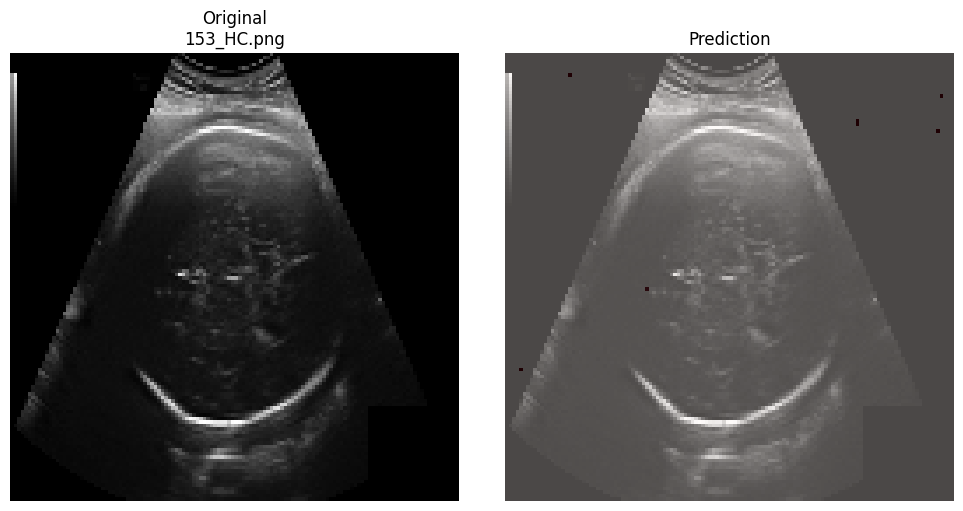

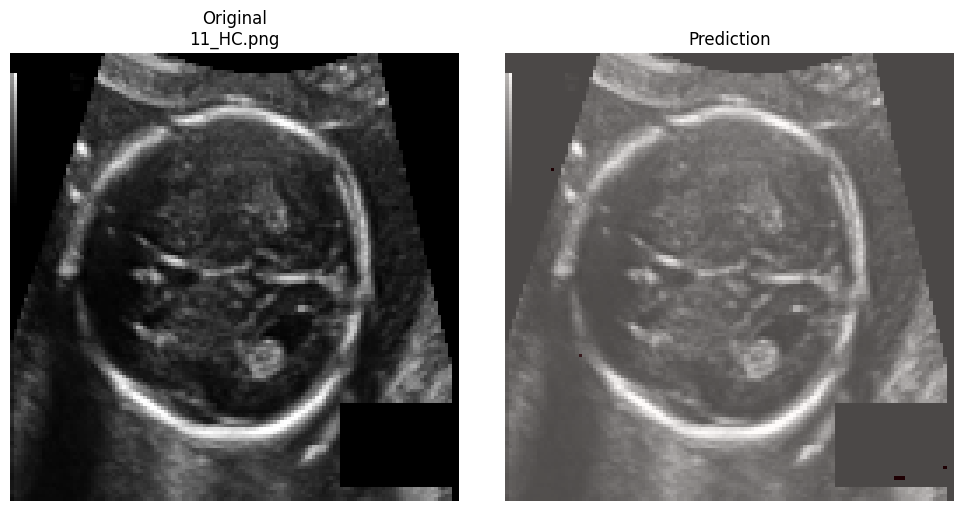

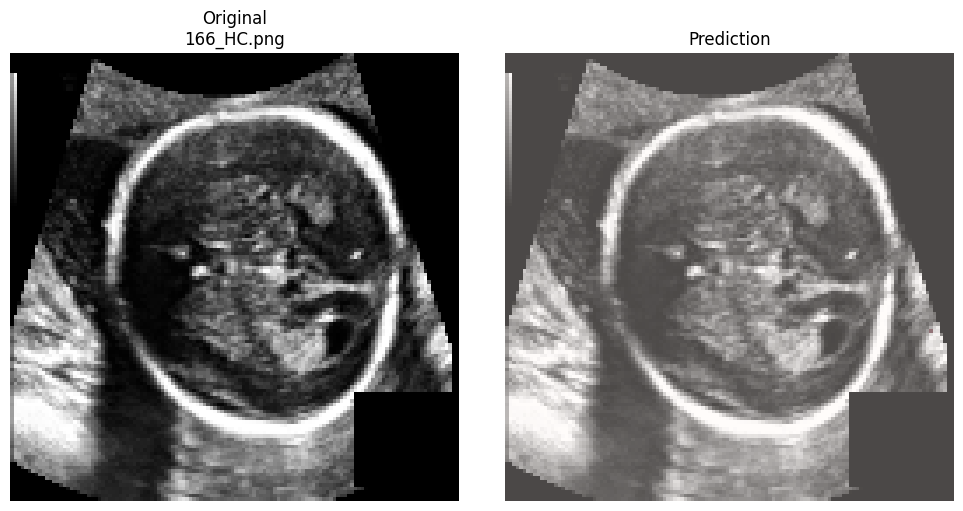

In [ ]:
import cv2
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import segmentation_models_pytorch as smp
from sklearn.metrics import accuracy_score, f1_score

class EvalConfig:
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    MODEL_PATH = '/content/best_segnet_model.pth'
    TEST_IMAGE_DIR = '/content/data/test/images'
    TEST_MASK_DIR = '/content/data/test/masks'
    PIXEL_SIZE_CSV = '/content/drive/MyDrive/test_set_pixel_size.csv'
    OUTPUT_CSV = 'hc_predictions.csv'
    THRESHOLD = 0.5

config = EvalConfig()

class TestUltrasoundDataset(Dataset):
    def __init__(self, image_dir, mask_dir=None, target_size=(128, 128)):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.has_masks = mask_dir is not None
        self.image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])
        self.target_size = target_size

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.image_files[idx])
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, self.target_size)
        image_tensor = torch.from_numpy(image).unsqueeze(0).float()

        if self.has_masks:
            mask_path = os.path.join(self.mask_dir, self.image_files[idx])
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            mask = cv2.resize(mask, self.target_size)
            mask_tensor = torch.from_numpy(mask).unsqueeze(0).float()
            return image_tensor, mask_tensor, self.image_files[idx]
        return image_tensor, self.image_files[idx]

def calculate_metrics(y_true, y_pred):
    """Calculate evaluation metrics"""
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    accuracy = accuracy_score(y_true, y_pred)
    dice = f1_score(y_true, y_pred)
    return {'accuracy': accuracy, 'dice': dice}

def evaluate_test_set():
    model = load_model(config.MODEL_PATH)
    has_masks = os.path.exists(config.TEST_MASK_DIR)

    test_dataset = TestUltrasoundDataset(
        config.TEST_IMAGE_DIR,
        config.TEST_MASK_DIR if has_masks else None
    )
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
    pixel_size_df = pd.read_csv(config.PIXEL_SIZE_CSV)

    results = []
    all_metrics = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Processing test images"):
            if has_masks:
                images, masks, filenames = batch
                masks = masks.to(config.DEVICE)
            else:
                images, filenames = batch

            images = images.to(config.DEVICE)
            outputs = model(images)
            pred_masks = (outputs > config.THRESHOLD).float()

            # Calculate metrics
            if has_masks:
                metrics = calculate_metrics(
                    masks.cpu().numpy().astype(int),
                    pred_masks.cpu().numpy().astype(int)
                )
                all_metrics.append(metrics)

            # Process each sample in batch (batch_size=1 in this case)
            for i in range(len(filenames)):
                pred_mask = pred_masks[i].squeeze().cpu().numpy()
                ellipse = fit_ellipse_to_mask(pred_mask)
                orig_filename = filenames[i]

                # Get pixel size
                try:
                    match = pixel_size_df[pixel_size_df['filename'] == orig_filename]
                    pixel_size = match['pixel size'].values[0] if len(match) > 0 else 1.0
                except:
                    pixel_size = 1.0

                if ellipse is not None:
                    hc_mm = calculate_hc(ellipse, pixel_size)
                    results.append({
                        'filename': orig_filename,
                        'hc_mm': hc_mm,
                        'pixel_size_mm': pixel_size,
                        **({'metrics': metrics[i]} if has_masks else {})
                    })
                else:
                    results.append({
                        'filename': orig_filename,
                        'hc_mm': None,
                        'pixel_size_mm': pixel_size,
                        **({'metrics': metrics[i]} if has_masks else {})
                    })

    # Save results
    results_df = pd.DataFrame(results)
    results_df.to_csv(config.OUTPUT_CSV, index=False)

    # Print average metrics
    if has_masks and all_metrics:
        avg_metrics = pd.DataFrame(all_metrics).mean()
        print("\nAverage Evaluation Metrics:")
        print(f"Dice Score: {avg_metrics['dice']:.4f}")
        print(f"Accuracy: {avg_metrics['accuracy']:.4f}")

    return results_df

def visualize_sample_predictions(model, num_samples=3):
    """Visualize sample predictions with ground truth if available"""
    has_masks = os.path.exists(config.TEST_MASK_DIR)
    dataset = TestUltrasoundDataset(
        config.TEST_IMAGE_DIR,
        config.TEST_MASK_DIR if has_masks else None
    )

    indices = np.random.choice(len(dataset), min(num_samples, len(dataset)), replace=False)

    for idx in indices:
        if has_masks:
            image, mask, filename = dataset[idx]
            mask = mask.squeeze().numpy()
        else:
            image, filename = dataset[idx]
            mask = None

        image = image.to(config.DEVICE)
        with torch.no_grad():
            pred = model(image.unsqueeze(0))
            pred_mask = (pred > config.THRESHOLD).float().squeeze().cpu().numpy()

        plt.figure(figsize=(15, 5))

        # Original Image
        plt.subplot(1, 3, 1)
        plt.imshow(image.squeeze().cpu().numpy(), cmap='gray')
        plt.title(f"Original\n{filename}")
        plt.axis('off')

        # Prediction
        plt.subplot(1, 3, 2)
        plt.imshow(image.squeeze().cpu().numpy(), cmap='gray')
        plt.imshow(pred_mask, alpha=0.3, cmap='Reds')
        plt.title("Prediction")
        plt.axis('off')

        # Ground Truth (if available)
        if has_masks:
            plt.subplot(1, 3, 3)
            plt.imshow(image.squeeze().cpu().numpy(), cmap='gray')
            plt.imshow(mask, alpha=0.3, cmap='Blues')
            plt.title("Ground Truth")
            plt.axis('off')

        plt.tight_layout()
        plt.show()

        if has_masks:
            metrics = calculate_metrics(mask.astype(int), pred_mask.astype(int))
            print(f"Metrics for {filename}:")
            print(f"Dice: {metrics['dice']:.4f}, Accuracy: {metrics['accuracy']:.4f}")

# Usage in main
if __name__ == "__main__":
    if check_files_exist():
        print("All required files found. Starting evaluation...")
        model = load_model(config.MODEL_PATH)
        results_df = evaluate_test_set()
        visualize_sample_predictions(model, num_samples=3)